In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path = "..\\output_videos\\cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

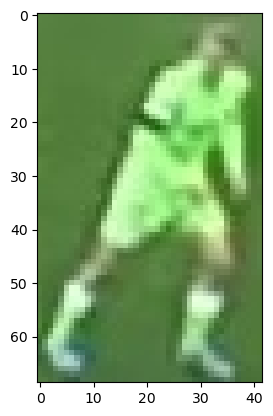

In [8]:
plt.imshow(image)

# take top half of image

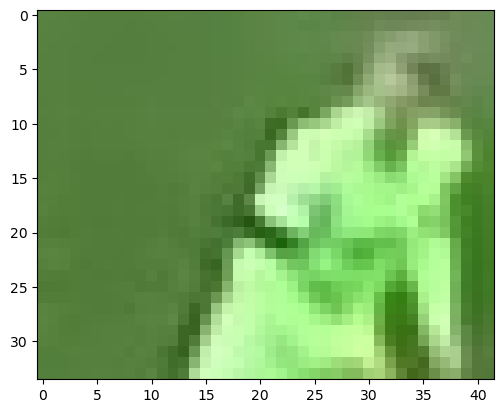

In [9]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

# Cluster Background and tshirt

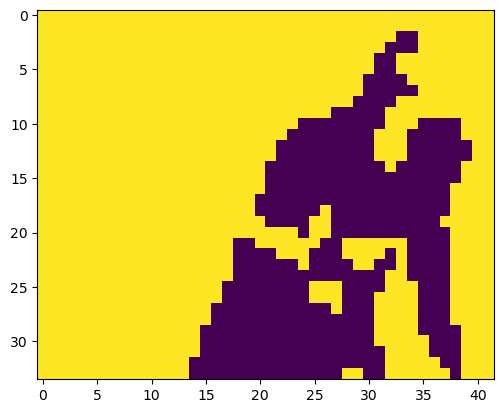

In [ ]:
# Reshape the image into 2D array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clusting with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [12]:
# get corner clusters to signify background
corner_clusters = [clustered_image[0,0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]

# get value of corner clusters
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_clusters)

1


In [13]:
player_cluster = 1-non_player_clusters
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster]

array([168.72087379, 232.59708738, 143.01213592])